<a href="https://colab.research.google.com/github/AlbertoGhub/Testing_projects/blob/main/CLASSIFIER_Choosing_The_Right_Model_For_Your_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing data from google

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Personal_projects/3. CLASSIFIER: Choosing The Right Model For Your Data/Data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Shape

df.shape

(303, 14)

In [5]:
# Checking NaNs

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


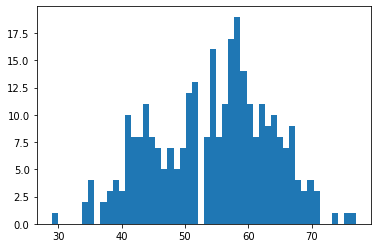

In [7]:
plt.hist(df["age"], bins=50);

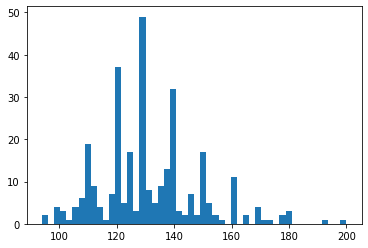

In [8]:
plt.hist(df["trestbps"], bins=50);

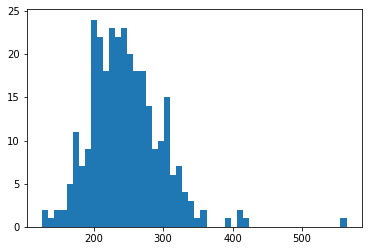

In [9]:
plt.hist(df["chol"], bins=50);

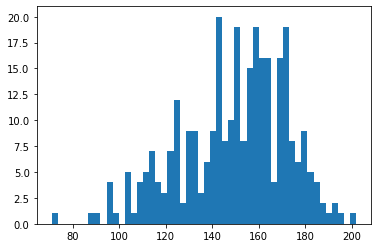

In [10]:
plt.hist(df["thalach"], bins=50);

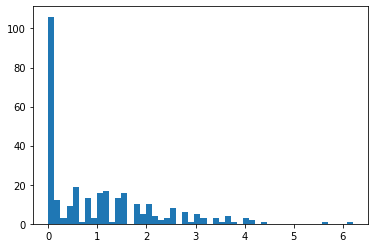

In [11]:
plt.hist(df["oldpeak"], bins=50);

In [12]:
# Value counts

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
# Splitting the data:

X = df.drop(["target"], axis = 1)
y = df["target"]

In [14]:
# Splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Instantiating the mdoel

clf = LinearSVC(max_iter = 1000000)
clf_1 = RandomForestClassifier(n_estimators=10000)

# fitting the model (training)

clf.fit(X_train, y_train)
clf_1.fit(X_train, y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Now that we have a more effective model, let's now make predictions. We can use 2 ways of doing this: Predict() and predeict_proba()

In [16]:
# Getting the score

y1_preds = clf.predict(X_test)
y2_preds = clf_1.predict(X_test)
print(f"\nThe score with this classification with RandomForestClassifier model is:\n{np.around(accuracy_score(y_test, y1_preds), 4)*100}%")
print(f"\nThe score with this classification with RandomForestClassifier model is:\n{np.around(accuracy_score(y_test, y2_preds), 4)*100}%")


The score with this classification with RandomForestClassifier model is:
86.89%

The score with this classification with RandomForestClassifier model is:
86.89%


# In this case, both models got the same accuracy, but this is just an example on how we need to be testing different models to have better performances. On the other hand, with predict, we got the predictions, showing us the accurecy of the model around 87%. With proba, we will get the probability of that prediction for each row and it can be only used on certain models

In [17]:
clf_1.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [18]:
print(f"The probability that's shown with proba presented in percentages:\n\n{clf_1.predict_proba(X_test[:8])*100}")

The probability that's shown with proba presented in percentages:

[[90.54  9.46]
 [41.45 58.55]
 [47.4  52.6 ]
 [86.97 13.03]
 [20.83 79.17]
 [14.97 85.03]
 [29.04 70.96]
 [95.5   4.5 ]]


In [19]:
# Checking the values for heart diseases. 1 = yes, 0 =  no
y.value_counts()

1    165
0    138
Name: target, dtype: int64

# The sliced data is showing us the probability of the first 8 rows of being false or true, representing, the patience having heart disease or not